Below is code for generating the graphs for vendor tag names.

2: Arabic
4: Breakfast
5: Burgers
8: Desserts
91: Free Delivery
22: Grills
12: Lebanese
24: Salads
16: Sandwiches
23: Shawarma
41: Cakes
51: Crepes
34: Italian
27: Pasta
15: Pizzas
28: Soups
10: Indian
30: Fries
42: Mexican
1: American
32: Milkshakes
3: Asian
9: Healthy Food
11: Japanese
54: Sushi
52: Mojitos 
53: Mandazi
13: Omani
50: Manakeesh
48: Kids meal
57: Donuts
38: Fresh Juices
43: Ice creams
62: Pancakes
25: Waffles
29: Hot Dogs
58: Dimsum
33: Rice
56: Sweets
35: Steaks
89: Pizza
47: Mishkak
31: Biryani
67: Thali
21: Vegetarian
63: Pastry
17: Seafood
nan: nan
7: Chinese
19: Thai
60: Coffee
73: Organic
36: Smoothies
79: Karak
45: Rolls
61: Hot Chocolate
90: Pastas
83: Combos
26: Bagels
80: Churros
77: Shuwa
64: Frozen yoghurt
71: Kushari
86: Spanish Latte
49: Family Meal
44: Kebabs
6: Cafe
46: Fatayers
     id  Arabic  Breakfast  Burgers  Desserts  Free Delivery  Grills  \
0     4       1          1        1         1              1       1   
1    13       0          1       

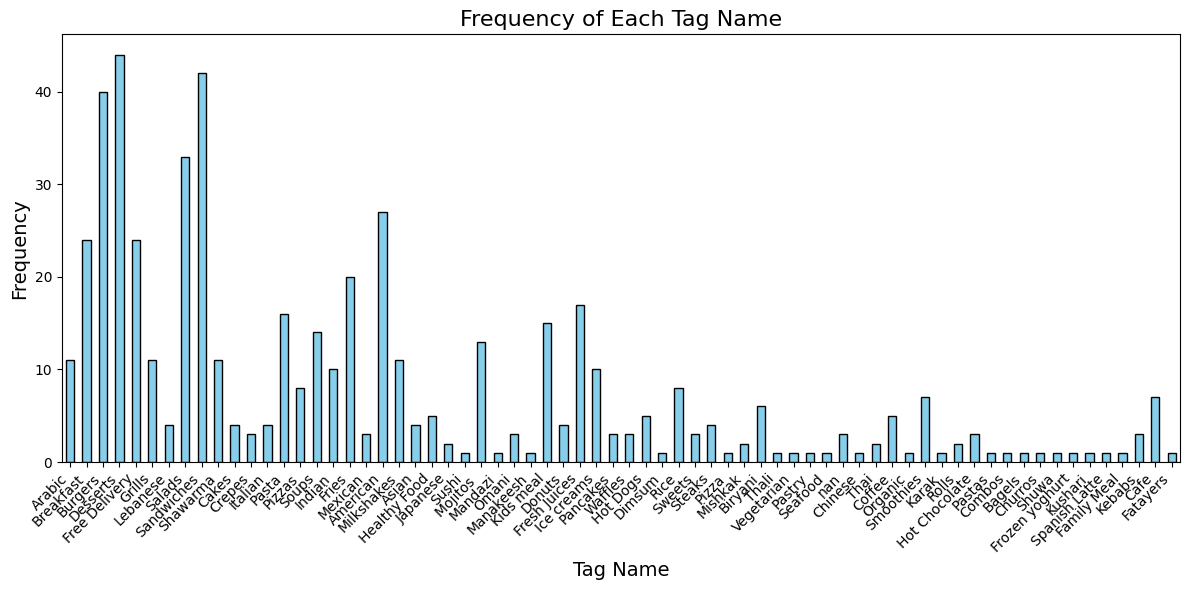

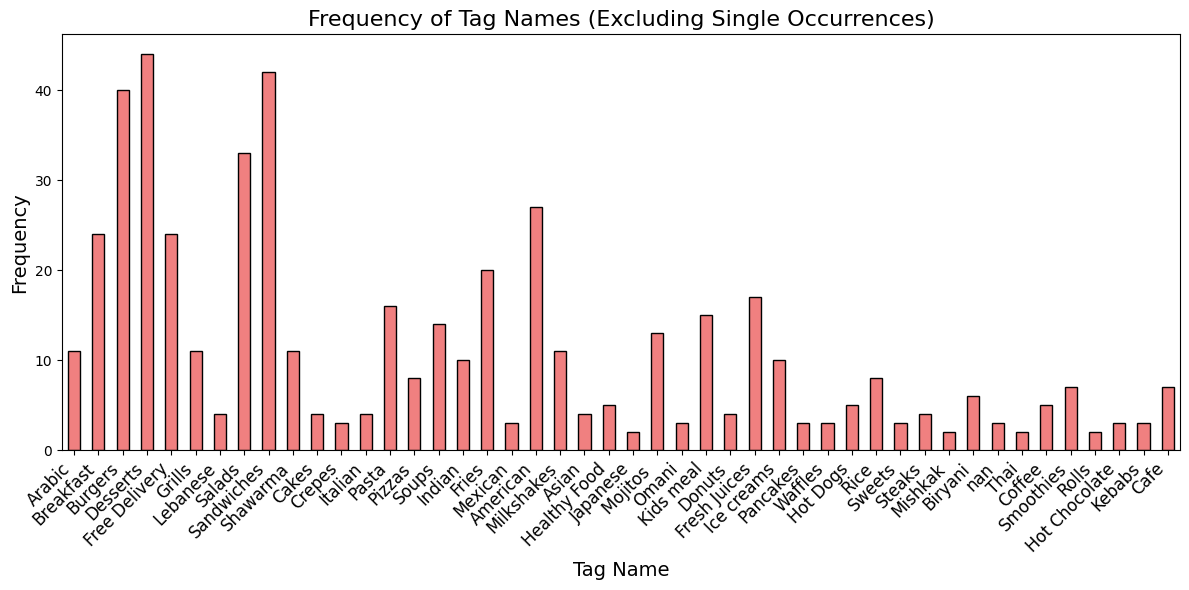

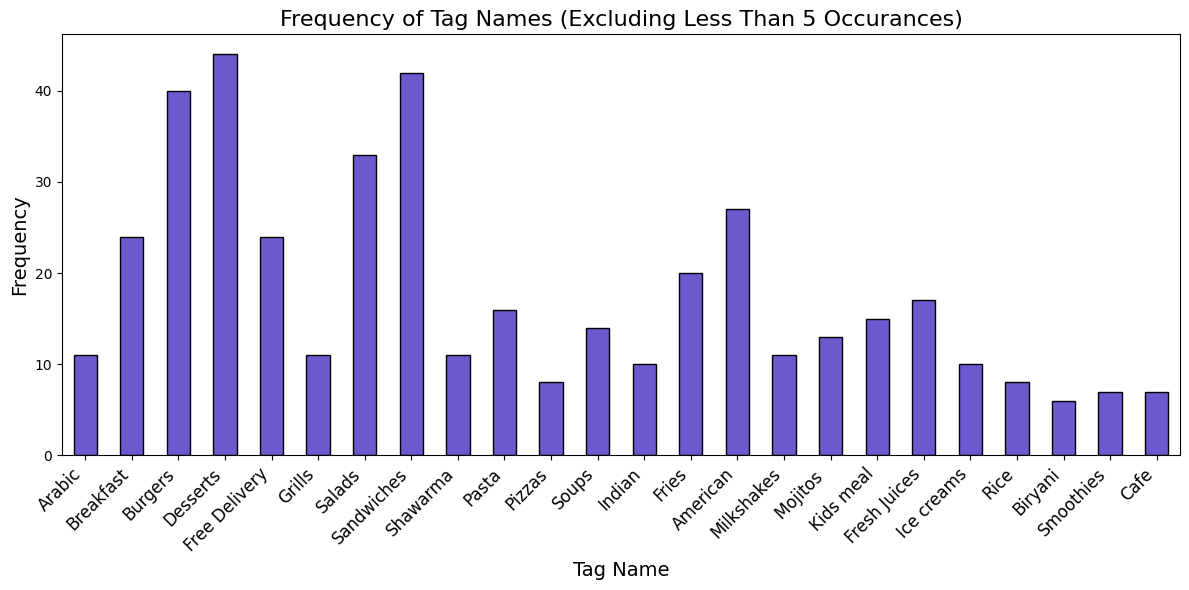

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Import clean vendors
vendors = pd.read_csv('../data/vendors.csv')

# Extract necessary columns from vendors.csv
vendors = vendors[['id', 'vendor_tag', 'vendor_tag_name']]

# Initialize the dictionary
tag_to_name = {}

# Iterate through each row and add tag-name pairs to the dictionary
for _, row in vendors.iterrows():
    tags = str(row['vendor_tag']).split(',')
    tag_names = str(row['vendor_tag_name']).split(',')
    
    # Add pairs to the dictionary
    for tag, tag_name in zip(tags, tag_names):
        tag_to_name[tag] = tag_name

for tag in tag_to_name:
    print(f'{tag}: {tag_to_name[tag]}')

# Get all unique tag_names (columns for one-hot encoding)
unique_tag_names = list(tag_to_name.values())

# Initialize an empty list to store the one-hot encoded rows
one_hot_encoded = []

# Create the one-hot encoded representation for each row, including id
for _, row in vendors.iterrows():
    tags = str(row['vendor_tag']).split(',')
    # Initialize the row with id and 0s for each tag_name
    one_hot_row = {'id': row['id']}  # Add the 'id' to the row
    for tag_name in unique_tag_names:
        one_hot_row[tag_name] = 0  # Set each tag_name to 0 initially
    
    # Mark 1 for the tag_names present in the vendor_tag for this row
    for tag in tags:
        tag_name = tag_to_name.get(tag)
        if tag_name:
            one_hot_row[tag_name] = 1
    
    one_hot_encoded.append(one_hot_row)

# Convert the one-hot encoded list to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded)

# Display the result
print(one_hot_df)

# Drop the `id` column and calculate the sum for each tag_name
tag_sums = one_hot_df.drop(columns=['id']).sum()

# Create the bar plot
plt.figure(figsize=(12, 6))
tag_sums.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Each Tag Name', fontsize=16)
plt.xlabel('Tag Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Filter out columns with only one occurrence
filtered_tag_sums = tag_sums[tag_sums > 1]

# Create the bar plot
plt.figure(figsize=(12, 6))
filtered_tag_sums.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Frequency of Tag Names (Excluding Single Occurrences)', fontsize=16)
plt.xlabel('Tag Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Filter out columns with less than 5 occurrences
filtered_tag_sums = tag_sums[tag_sums > 5]

# Create the bar plot
plt.figure(figsize=(12, 6))
filtered_tag_sums.plot(kind='bar', color='slateblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Tag Names (Excluding Less Than 5 Occurances)', fontsize=16)
plt.xlabel('Tag Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()

# Show the plot
plt.show()